# **Moniqo Group Project**

### **Data Cleaning** 

> -- Put any steps here
**Process:**
1. Understand the problem & data
2. Import & inspect the data 
3. Handle missing data
4. Explore data characteristics 
5. Perform data transformation 
6. Visualize relationship of data
7. Handle outliers 
8. Communicate findings & insights 



***Data description:*** entire journey of a microfinance customer 
- **LoanId**                            (int64):        Unique identifier for each loan
- **AmountDisbursed**                   (int64):        Amount actually released to the borrower
- **Interest**                          (int64)
- **LoanBalance**                     (float64):        Remaining outstanding principal+ interest(current) tiền gốc còn nợ&lãi
- **BorrowDate**                       (object):        Date the loan was borrowed 
- **Product**                          (object):        Loan product type/category (5-7-10 weeks credit ease)
- **Branch**                           (object):        Branch/service point managing the loan
- **ClearDate**                        (object):        Scheduled date for the borrower to complete repayment
- **CustomerId**                        (int64)        
- **Gender**                           (object)
- **LoanLimit**                         (int64):        The maximum loan amount the customer is currently eligible for
- **CreditScore**                       (int64):        A numerical score representing the estimated risk of lending to the customer (higher score = better creditworthiness)
- **loan_repayment_txn_count**          (int64):        Number of loan repayment transactions made by borrower 
- **loan_repayment_total_paid**         (int64):        Total amount of money paid toward the loan so far (may include principal and interest)
- **loan_repayment_first_payment**     (object):        Date when the borrower made their first loan repayment
- **loan_repayment_last_payment**      (object):        Date of the most recent loan payment 
- **loan_overpayment**                  (int64):        Amount paid in excess of the required repayment 
- **missed_instalments**              (float64):        Number of repayment installments that were missed or paid late
- **Industry**                         (object):        The economic sector in which the customers' business operates
- **Business Type**                    (object):        Specific type of customers' business activity within the industry
- **Year of Establishment**            (int64):        Year in which the business was founded

# 1. Imports & Reading data

In [273]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler, StandardScaler



In [274]:
# Load datasets
main_data = pd.read_csv('repeat_loans_final.csv')

#main_data
main_data.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,missed_instalments,Industry,Business Type,Year of Establishment
0,951920,6000,1750,7750.0,11/29/2025,5 WEEKS CREDIT EASE,ENGINEER,1/3/2026,1819,FEMALE,8000,3500,1,500,29/11/2025,29/11/2025,0,5.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2017
1,951902,4000,1250,5250.0,11/28/2025,5 WEEKS CREDIT EASE,MOLO,1/2/2026,1818,FEMALE,9600,2500,1,1550,28/11/2025,28/11/2025,0,4.0,Food & Hospitality,Retail Shop,2019
2,949962,4000,1250,5250.0,11/26/2025,5 WEEKS CREDIT EASE,ENGINEER,31/12/2025,1815,FEMALE,8000,3500,1,1350,26/11/2025,26/11/2025,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2014
3,949189,4000,1250,5250.0,11/25/2025,5 WEEKS CREDIT EASE,MOLO,30/12/2025,1814,FEMALE,10000,1500,1,1000,25/11/2025,25/11/2025,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2018
4,948984,4000,1250,5250.0,11/24/2025,5 WEEKS CREDIT EASE,MOLO,29/12/2025,1813,FEMALE,10000,1500,1,1550,24/11/2025,24/11/2025,0,4.0,Business & Information,Bureau & Publishing Services,2018


# 2. Loading and Initial Exploration

In [275]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LoanId                        3572 non-null   int64  
 1   AmountDisbursed               3572 non-null   int64  
 2   Interest                      3572 non-null   int64  
 3   LoanBalance                   3572 non-null   float64
 4   BorrowDate                    3572 non-null   object 
 5   Product                       3572 non-null   object 
 6   Branch                        3572 non-null   object 
 7   ClearDate                     3572 non-null   object 
 8   CustomerId                    3572 non-null   int64  
 9   Gender                        3572 non-null   object 
 10  LoanLimit                     3572 non-null   int64  
 11  CreditScore                   3572 non-null   int64  
 12  loan_repayment_txn_count      3572 non-null   int64  
 13  loa

In [276]:
# Use df.describe() to get descriptive statistics 
# (mean, median, quartiles, etc.) for numerical columns.
main_data.describe()

,LoanId,AmountDisbursed,Interest,LoanBalance,CustomerId,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_overpayment,missed_instalments,Year of Establishment
count,3572.000000,3572.00000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3570.000000,3572.000000
mean,797454.956047,8330.62710,2840.173292,742.626431,1220.655655,13788.437850,2629.423292,11.528835,10400.055991,227.473124,2.477031,2018.017357
std,84628.990534,4886.57484,2342.248151,2861.775577,309.334425,10376.976115,2237.083252,11.747340,7088.355892,1316.093494,2.873470,3.016473
min,313772.000000,3000.00000,1000.000000,0.000000,23.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,2010.000000
25%,725231.000000,5000.00000,1500.000000,0.000000,1057.000000,8000.000000,2000.000000,6.000000,6500.000000,0.000000,0.000000,2016.000000
50%,798200.500000,7000.00000,2000.000000,0.000000,1232.000000,11000.000000,2000.000000,8.000000,9000.000000,0.000000,0.000000,2018.000000
75%,865180.750000,10000.00000,3000.000000,0.000000,1443.000000,16000.000000,2500.000000,14.000000,12750.000000,0.000000,5.000000,2020.000000
max,952310.000000,60000.00000,25000.000000,45500.000000,1819.000000,117000.000000,20000.000000,207.000000,74000.000000,21940.000000,12.000000,2025.000000


In [277]:
main_data.columns

Index(['LoanId', 'AmountDisbursed', 'Interest', 'LoanBalance', 'BorrowDate',
       'Product', 'Branch', 'ClearDate', 'CustomerId', 'Gender', 'LoanLimit',
       'CreditScore', 'loan_repayment_txn_count', 'loan_repayment_total_paid',
       'loan_repayment_first_payment', 'loan_repayment_last_payment',
       'loan_overpayment', 'missed_instalments', 'Industry', 'Business Type',
       'Year of Establishment'],
      dtype='object')

In [278]:
#Types of columns
main_data.dtypes

LoanId                            int64
AmountDisbursed                   int64
Interest                          int64
LoanBalance                     float64
BorrowDate                       object
Product                          object
Branch                           object
ClearDate                        object
CustomerId                        int64
Gender                           object
LoanLimit                         int64
CreditScore                       int64
loan_repayment_txn_count          int64
loan_repayment_total_paid         int64
loan_repayment_first_payment     object
loan_repayment_last_payment      object
loan_overpayment                  int64
missed_instalments              float64
Industry                         object
Business Type                    object
Year of Establishment             int64
dtype: object

# 3. Data Preprocessing

In [279]:
#convert date column to right python format
#pandas default to MM/DD/YYYY

main_data['BorrowDate'] = pd.to_datetime(main_data['BorrowDate'])
main_data['ClearDate'] = pd.to_datetime(main_data['ClearDate'], dayfirst = True)
main_data['loan_repayment_first_payment'] = pd.to_datetime(main_data['loan_repayment_first_payment'])
main_data['loan_repayment_last_payment'] = pd.to_datetime(main_data['loan_repayment_last_payment'])

/var/folders/l1/c99z4mxd4ys7m4330g1z_lcc0000gn/T/ipykernel_6116/176139383.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  main_data['loan_repayment_first_payment'] = pd.to_datetime(main_data['loan_repayment_first_payment'])
/var/folders/l1/c99z4mxd4ys7m4330g1z_lcc0000gn/T/ipykernel_6116/176139383.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  main_data['loan_repayment_last_payment'] = pd.to_datetime(main_data['loan_repayment_last_payment'])


In [280]:
main_data.dtypes

LoanId                                   int64
AmountDisbursed                          int64
Interest                                 int64
LoanBalance                            float64
BorrowDate                      datetime64[ns]
Product                                 object
Branch                                  object
ClearDate                       datetime64[ns]
CustomerId                               int64
Gender                                  object
LoanLimit                                int64
CreditScore                              int64
loan_repayment_txn_count                 int64
loan_repayment_total_paid                int64
loan_repayment_first_payment    datetime64[ns]
loan_repayment_last_payment     datetime64[ns]
loan_overpayment                         int64
missed_instalments                     float64
Industry                                object
Business Type                           object
Year of Establishment                    int64
dtype: object

In [281]:
#convert column type to string 
main_data['Branch'] = main_data['Branch'].astype('string')
main_data['Gender'] = main_data['Gender'].astype('string')
main_data['Industry'] = main_data['Industry'].astype('string')
main_data['Business Type'] = main_data['Business Type'].astype('string')


In [282]:
#Rename columns 
main_data = main_data.rename(columns={"Business Type": "BusinessType", 
                             "Year of Establishment": "YearEstablished", 
                             "missed_instalments":"MissedInstalments",
                             })

In [283]:
main_data.head()
main_data.columns

Index(['LoanId', 'AmountDisbursed', 'Interest', 'LoanBalance', 'BorrowDate',
       'Product', 'Branch', 'ClearDate', 'CustomerId', 'Gender', 'LoanLimit',
       'CreditScore', 'loan_repayment_txn_count', 'loan_repayment_total_paid',
       'loan_repayment_first_payment', 'loan_repayment_last_payment',
       'loan_overpayment', 'MissedInstalments', 'Industry', 'BusinessType',
       'YearEstablished'],
      dtype='object')

## 3.1. Handle missing values
#### a. Identify missing values

In [284]:
#create a copy to manipulate 
data = main_data.copy()
data.head()


,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,7750.0,2025-11-29,5 WEEKS CREDIT EASE,ENGINEER,2026-03-01,1819,FEMALE,8000,3500,1,500,2025-11-29,2025-11-29,0,5.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 WEEKS CREDIT EASE,MOLO,2026-02-01,1818,FEMALE,9600,2500,1,1550,2025-11-28,2025-11-28,0,4.0,Food & Hospitality,Retail Shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 WEEKS CREDIT EASE,ENGINEER,2025-12-31,1815,FEMALE,8000,3500,1,1350,2025-11-26,2025-11-26,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 WEEKS CREDIT EASE,MOLO,2025-12-30,1814,FEMALE,10000,1500,1,1000,2025-11-25,2025-11-25,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 WEEKS CREDIT EASE,MOLO,2025-12-29,1813,FEMALE,10000,1500,1,1550,2025-11-24,2025-11-24,0,4.0,Business & Information,Bureau & Publishing Services,2018


In [285]:
# Identify missing values 
main_data.isnull().sum()

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
MissedInstalments               2
Industry                        0
BusinessType                    0
YearEstablished                 0
dtype: int64

In [286]:
#Impute missing values (replace with 0)

main_data['MissedInstalments'] = main_data['MissedInstalments'].fillna(0).astype(int)


In [287]:
main_data.isnull().sum()

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
MissedInstalments               0
Industry                        0
BusinessType                    0
YearEstablished                 0
dtype: int64

In [288]:
# Identify NaN values
print(main_data.isna().sum())

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
MissedInstalments               0
Industry                        0
BusinessType                    0
YearEstablished                 0
dtype: int64


In [289]:
# Check duplicates
duplicates = main_data.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
3567    False
3568    False
3569    False
3570    False
3571    False
Length: 3572, dtype: bool

In [290]:
# --- To see the actual duplicate rows:
duplicate_rows = main_data[main_data.duplicated()]
duplicate_rows

#none (no duplicates)

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished


# 4. Feature Understanding

### Univariate Analysis
Plotting Feature distributions
Histograms: Visualize the distribution of numerical data using plt.hist().

Box plots: Identify the median, quartiles, and potential outliers using plt.boxplot() or sns.boxplot().

Bar charts: Explore the frequency of categorical data using plt.bar() or sns.countplot().

In [291]:
main_data.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,7750.0,2025-11-29,5 WEEKS CREDIT EASE,ENGINEER,2026-03-01,1819,FEMALE,8000,3500,1,500,2025-11-29,2025-11-29,0,5,Food & Hospitality,Green Grocery (Fruit/Vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 WEEKS CREDIT EASE,MOLO,2026-02-01,1818,FEMALE,9600,2500,1,1550,2025-11-28,2025-11-28,0,4,Food & Hospitality,Retail Shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 WEEKS CREDIT EASE,ENGINEER,2025-12-31,1815,FEMALE,8000,3500,1,1350,2025-11-26,2025-11-26,0,4,Food & Hospitality,Green Grocery (Fruit/Vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 WEEKS CREDIT EASE,MOLO,2025-12-30,1814,FEMALE,10000,1500,1,1000,2025-11-25,2025-11-25,0,4,Food & Hospitality,Green Grocery (Fruit/Vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 WEEKS CREDIT EASE,MOLO,2025-12-29,1813,FEMALE,10000,1500,1,1550,2025-11-24,2025-11-24,0,4,Business & Information,Bureau & Publishing Services,2018


In [292]:
main_data.columns

Index(['LoanId', 'AmountDisbursed', 'Interest', 'LoanBalance', 'BorrowDate',
       'Product', 'Branch', 'ClearDate', 'CustomerId', 'Gender', 'LoanLimit',
       'CreditScore', 'loan_repayment_txn_count', 'loan_repayment_total_paid',
       'loan_repayment_first_payment', 'loan_repayment_last_payment',
       'loan_overpayment', 'MissedInstalments', 'Industry', 'BusinessType',
       'YearEstablished'],
      dtype='object')

#### a. Histogram

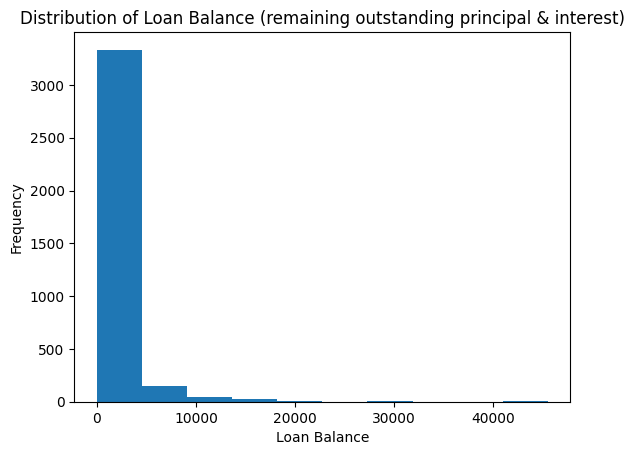

In [293]:
plt.hist(main_data['LoanBalance'])

plt.xlabel('Loan Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Balance (remaining outstanding principal & interest)')

plt.show()

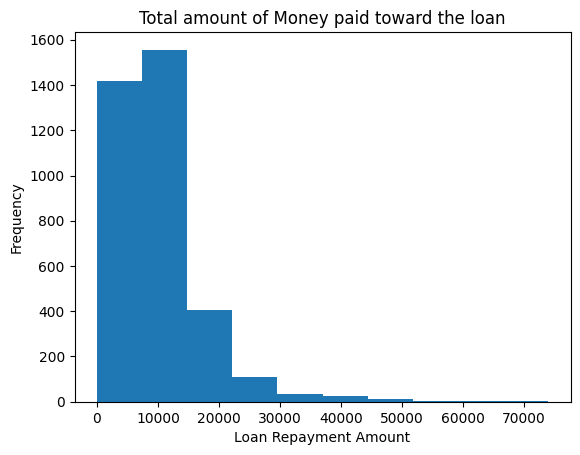

In [294]:
plt.hist(main_data['loan_repayment_total_paid'])

plt.xlabel('Loan Repayment Amount')
plt.ylabel('Frequency')
plt.title("Total amount of Money paid toward the loan")

plt.show()


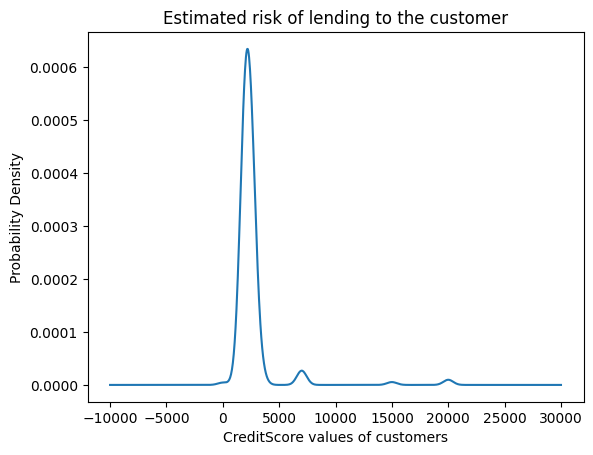

In [295]:
main_data['CreditScore'].plot(kind= 'kde',
                              title = "Estimated risk of lending to the customer")

plt.xlabel('CreditScore values of customers') #credit score level (higher the better)
plt.ylabel('Probability Density') #how concentrated customers are with different score ranges

plt.show()

### b. Box plot

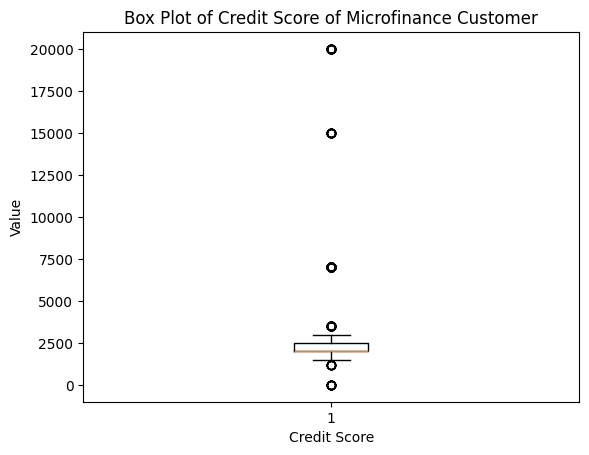

In [296]:
plt.boxplot(main_data['CreditScore'])

plt.xlabel('Credit Score')
plt.ylabel('Value')
plt.title('Box Plot of Credit Score of Microfinance Customer')

plt.show()

### c. Bar chart: Explore the frequency of categorical data using plt.bar() or sns.countplot().

<BarContainer object of 2 artists>

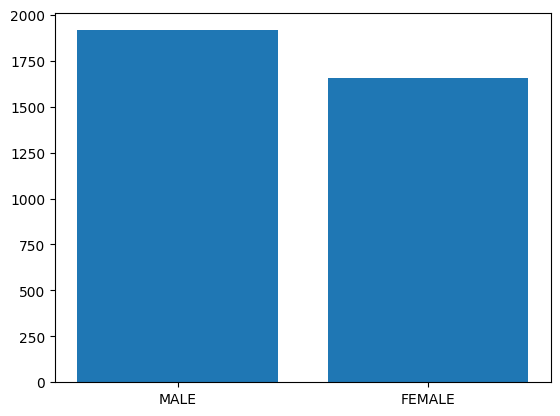

In [297]:
gender_counts = main_data['Gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)

<BarContainer object of 6 artists>

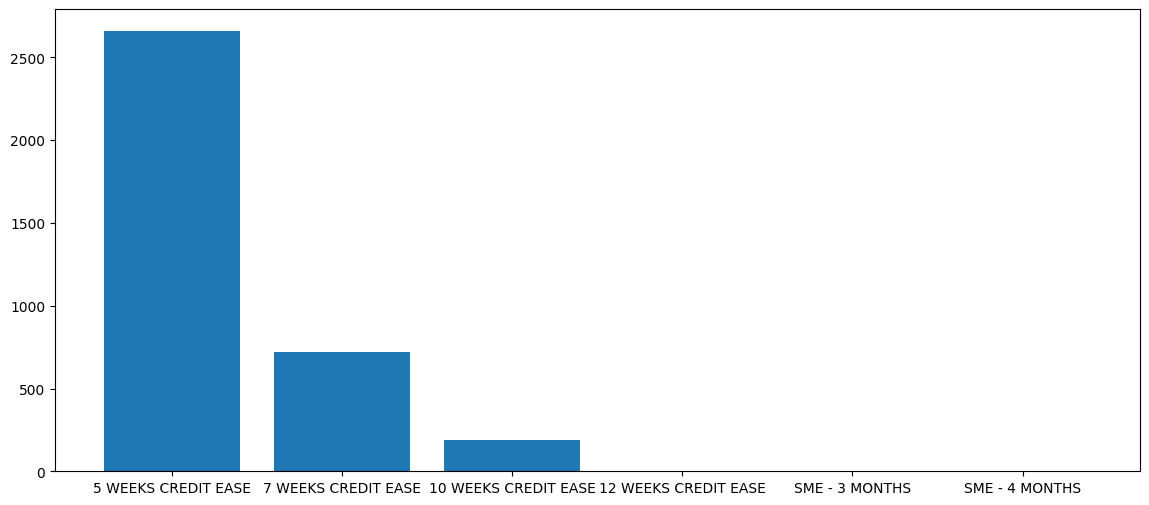

In [298]:
plt.figure(figsize=(14, 6)) 

businesstype_counts = main_data['Product'].value_counts()

plt.bar(businesstype_counts.index, businesstype_counts.values)

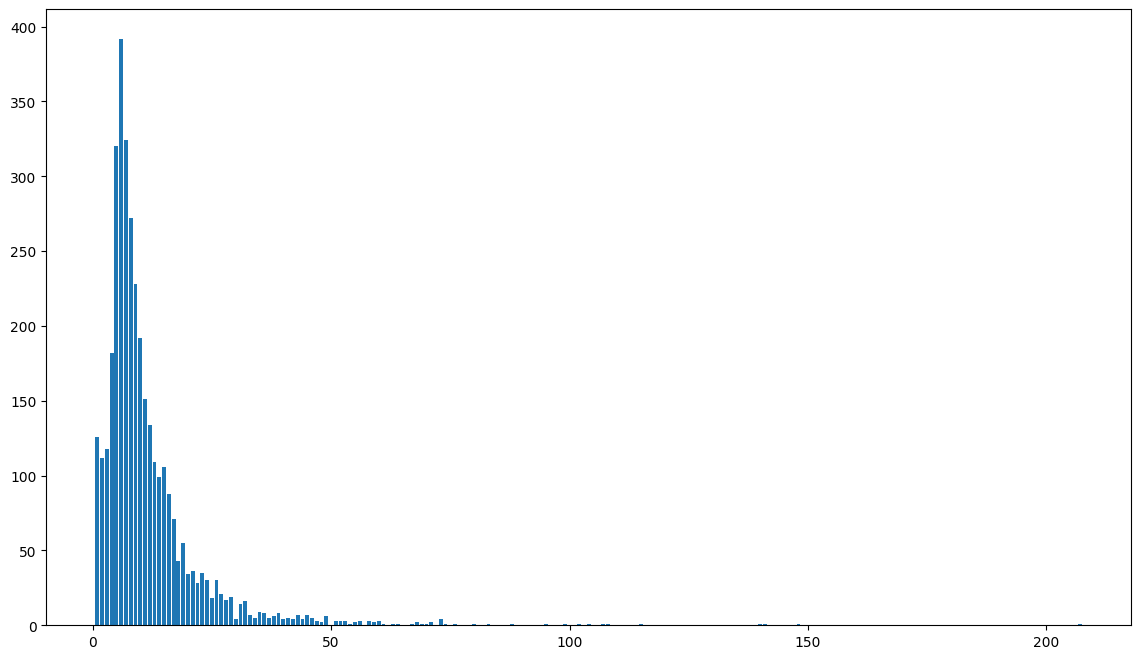

In [299]:
plt.figure(figsize=(14, 8)) 

repayment_counts = main_data['loan_repayment_txn_count'].value_counts()

plt.bar(repayment_counts.index, repayment_counts.values)

plt.show()

## Bivariate Analysis

Scatter plots: Visualize the relationship between two numerical variables using plt.scatter().

Correlation matrices: Calculate and visualize correlations between multiple numerical variables using df.corr() and sns.heatmap().

Grouped analyses: Use df.groupby() to analyze data within different categories.


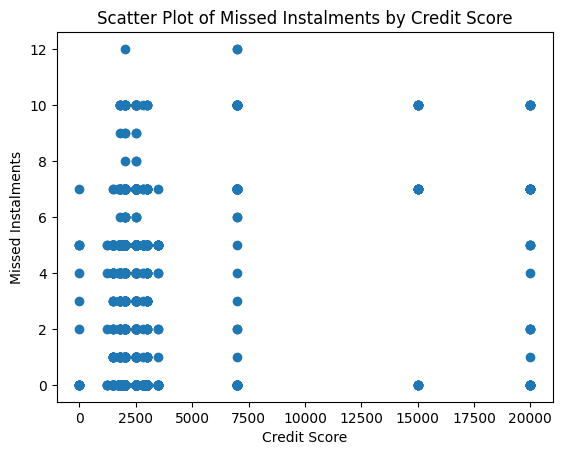

In [300]:
#Scatter plots 

plt.scatter(main_data['CreditScore'], main_data['MissedInstalments'])

plt.xlabel('Credit Score')
plt.ylabel('Missed Instalments')
plt.title('Scatter Plot of Missed Instalments by Credit Score')

plt.show()

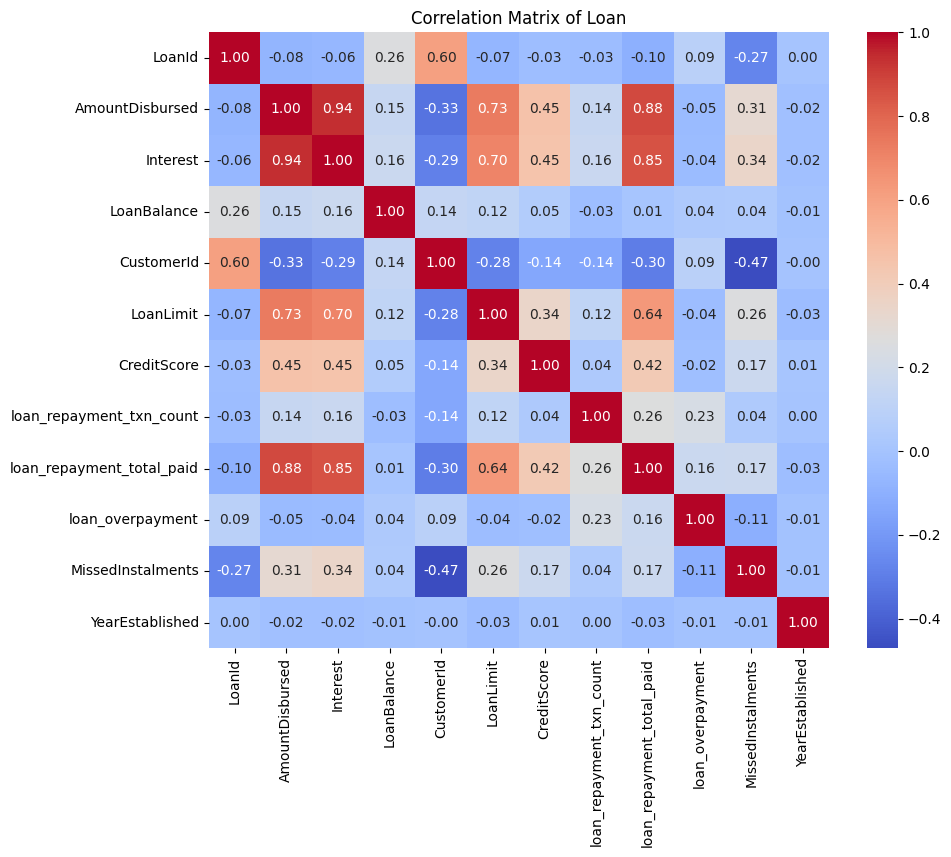

In [301]:
#Correlation
plt.figure(figsize=(10, 8))

numeric_data = main_data.select_dtypes(include=['number'])

correlations = numeric_data.corr()

sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Loan')

plt.show()

**Features engineering on relationships between:**
- AmountDisbursed & Interest (&Loan Limit) & (loan_repayment_total_paid) & CustomerID
- Interest & loan_repayment_total_paid
- MissedInstalments & Customer ID 
- CreditScore & AmountDisbursed & Interest

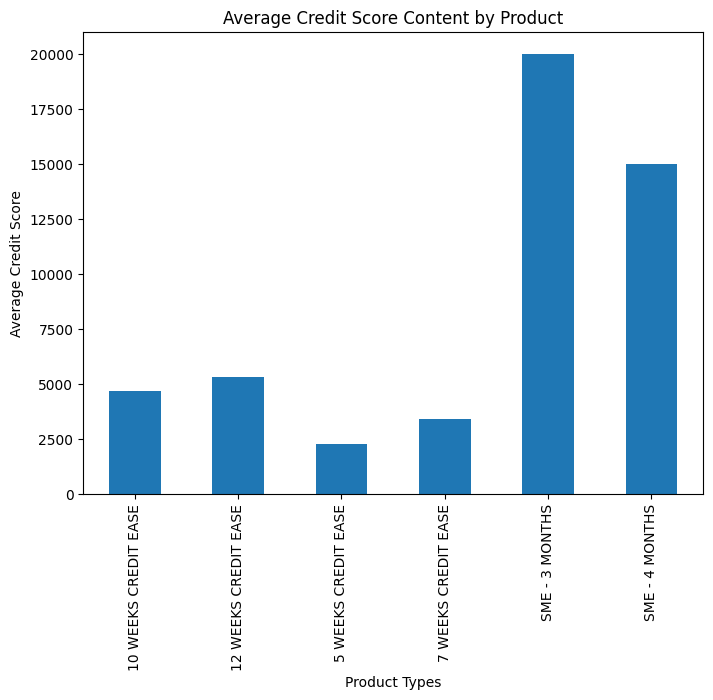

In [302]:
#Group analysis
average_creditscore_by_product = data.groupby('Product')['CreditScore'].mean()

plt.figure(figsize=(8, 6))

average_creditscore_by_product.plot(kind='bar')

plt.xlabel('Product Types')
plt.ylabel('Average Credit Score')
plt.title('Average Credit Score Content by Product')

plt.show()

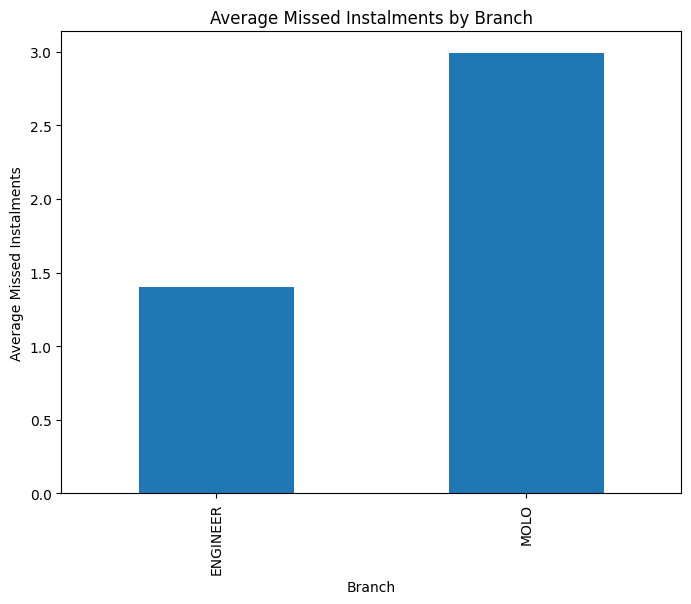

In [303]:
#Group analysis
average_misinstalments_by_branch = data.groupby('Branch')['MissedInstalments'].mean()

plt.figure(figsize=(8, 6))

average_misinstalments_by_branch.plot(kind='bar')

plt.xlabel('Branch')
plt.ylabel('Average Missed Instalments')
plt.title('Average Missed Instalments by Branch')

plt.show()

## Multivariate Analysis

Pair plots: Visualize pairwise relationships between multiple variables using sns.pairplot().

**Features engineering on relationships between:**
- AmountDisbursed & Interest (&Loan Limit) & (loan_repayment_total_paid) & CustomerID
- Interest & loan_repayment_total_paid
- MissedInstalments & Customer ID 
- CreditScore & AmountDisbursed & Interest

<Figure size 800x600 with 0 Axes>

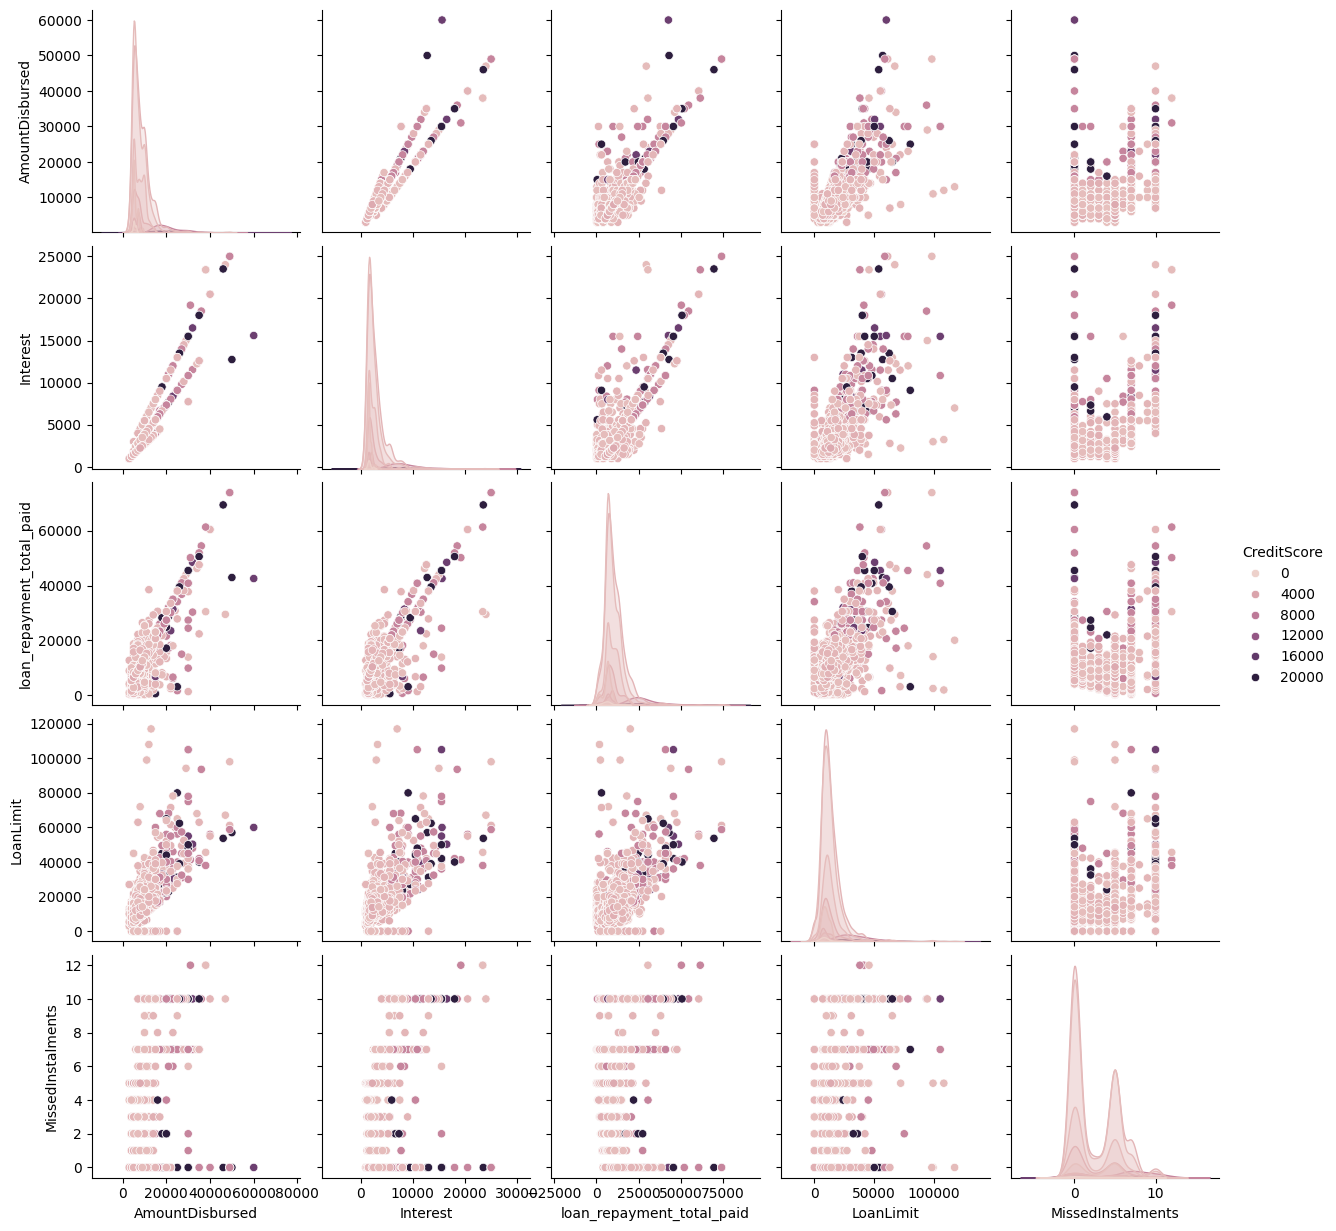

In [304]:
plt.figure(figsize=(8, 6))

features = ['AmountDisbursed', 'Interest', 'loan_repayment_total_paid', 'LoanLimit', 'MissedInstalments', 'CreditScore']

sns.pairplot(main_data[features], hue='CreditScore') 

plt.show()

# 5. Outlier detection & Handling

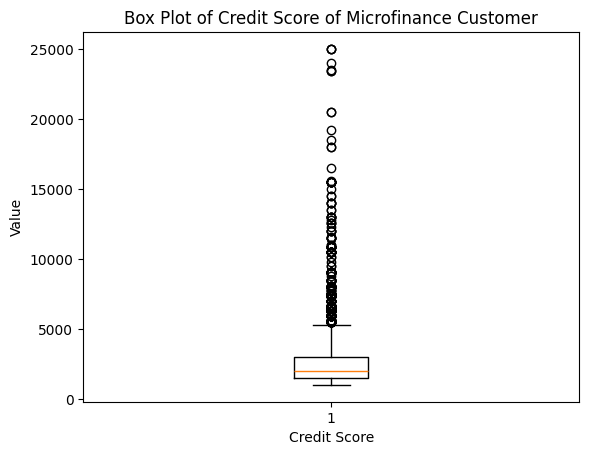

In [ ]:
plt.boxplot(main_data['Interest'])

plt.xlabel('Credit Score')
plt.ylabel('Value')
plt.title('Box Plot of Credit Score of Microfinance Customer')

plt.show()

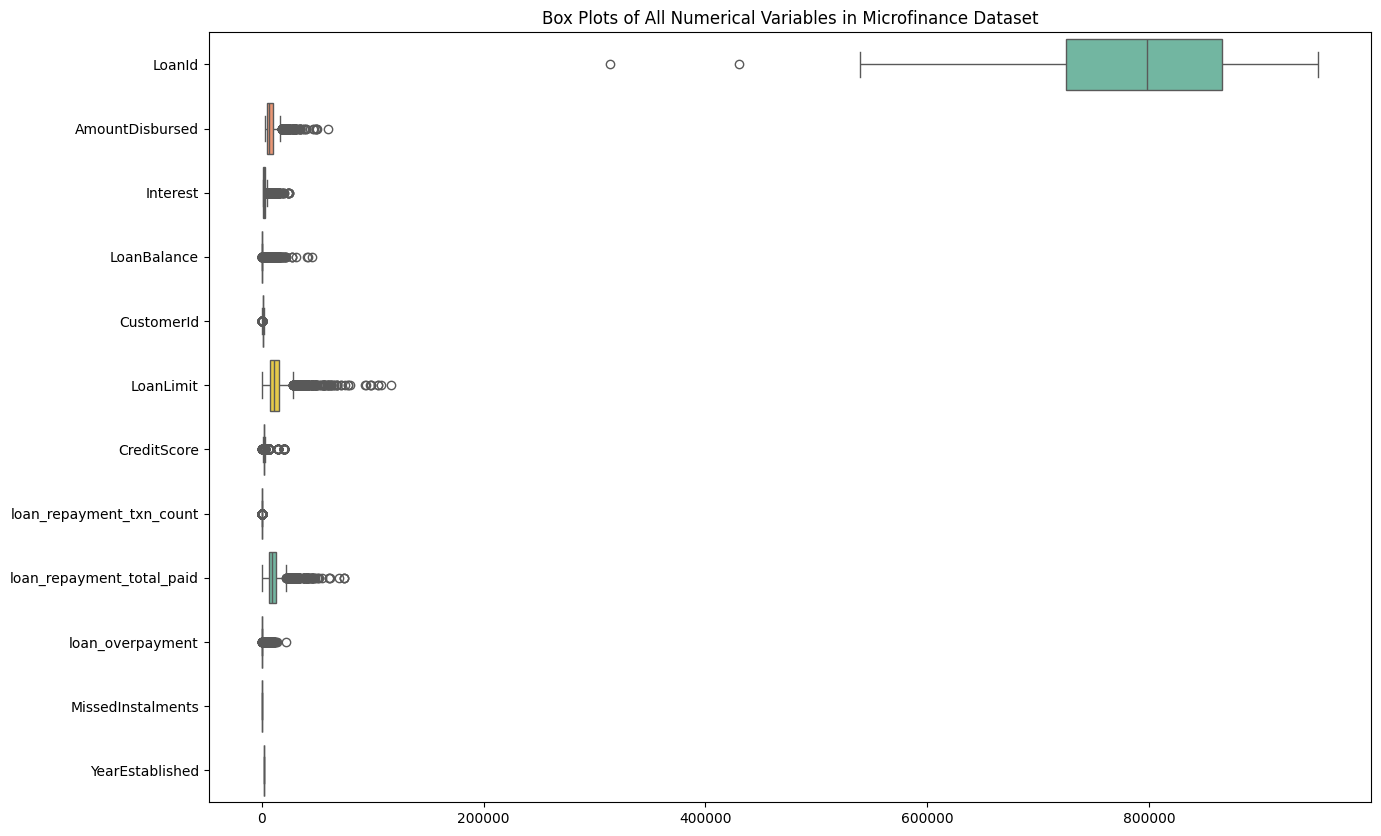

In [306]:
#Outliers for numerical data

numerical_data = main_data.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 10))  

sns.boxplot(data=numerical_data, orient="h", palette="Set2") 

plt.title('Box Plots of All Numerical Variables in Microfinance Dataset')

plt.show()

In [307]:
#Identification using IQR 

def find_outliers_iqr(data, column):
  """
  Identifies outliers in a DataFrame column using the IQR method.

  Args:
      data: Pandas DataFrame.
      column: Name of the column to check for outliers.

  Returns:
      A Series of boolean values indicating outliers.
  """
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return (data[column] < lower_bound) | (data[column] > upper_bound)

# --- Identify outliers in all numerical columns ---

# Select only the numerical columns
numerical_data = data.select_dtypes(include=[np.number])

for column in numerical_data.columns:
    outliers = find_outliers_iqr(main_data, column)
    print(f"Number of outliers in '{column}': {outliers.sum()}")

Number of outliers in 'LoanId': 2
Number of outliers in 'AmountDisbursed': 157
Number of outliers in 'Interest': 374
Number of outliers in 'LoanBalance': 417
Number of outliers in 'CustomerId': 99
Number of outliers in 'LoanLimit': 235
Number of outliers in 'CreditScore': 230
Number of outliers in 'loan_repayment_txn_count': 239
Number of outliers in 'loan_repayment_total_paid': 194
Number of outliers in 'loan_overpayment': 162
Number of outliers in 'MissedInstalments': 0
Number of outliers in 'YearEstablished': 0


**Features to transform:**
- AmountDisbursed (log / ratio)
- Interest
- LoanBalance
- loan_repayment_total_paid

**Transformation method:**
- log: replace a value with its logarithm (when data is right-skewed, span orders of magnitude)
- ratio: divide one variable by another related variable (when there are connected variables) --> suitable for feature engineering
- cap: You limit extreme values at a chosen percentile (Numerical instability caused by extreme but rare values)

#### a1. AmountDisbursed

In [308]:
# (Create a copy of the data to avoid modifying the original)
main_data_no_outliers = main_data.copy()
main_data_no_outliers = main_data_no_outliers[~outliers]

Treatment: Decide whether to remove, transform, or keep outliers based on their nature and the analysis goals.

In [309]:
# (Create another copy for this method)
main_data_capped = main_data.copy()
upper_cap = data['AmountDisbursed'].quantile(0.95)  # Cap at 95th percentile 
# ngưỡng cap, mọi giá trị vượt quá ngưỡng sẽ bị đưa xuống ngưỡng 
main_data_capped['AmountDisbursed'] = np.where(
    main_data_capped['AmountDisbursed'] > upper_cap,
    upper_cap,
    main_data_capped['AmountDisbursed']
)

# Nếu giá trị > upper_cap → thay bằng upper_cap
# Nếu giá trị <= upper_cap → giữ nguyên

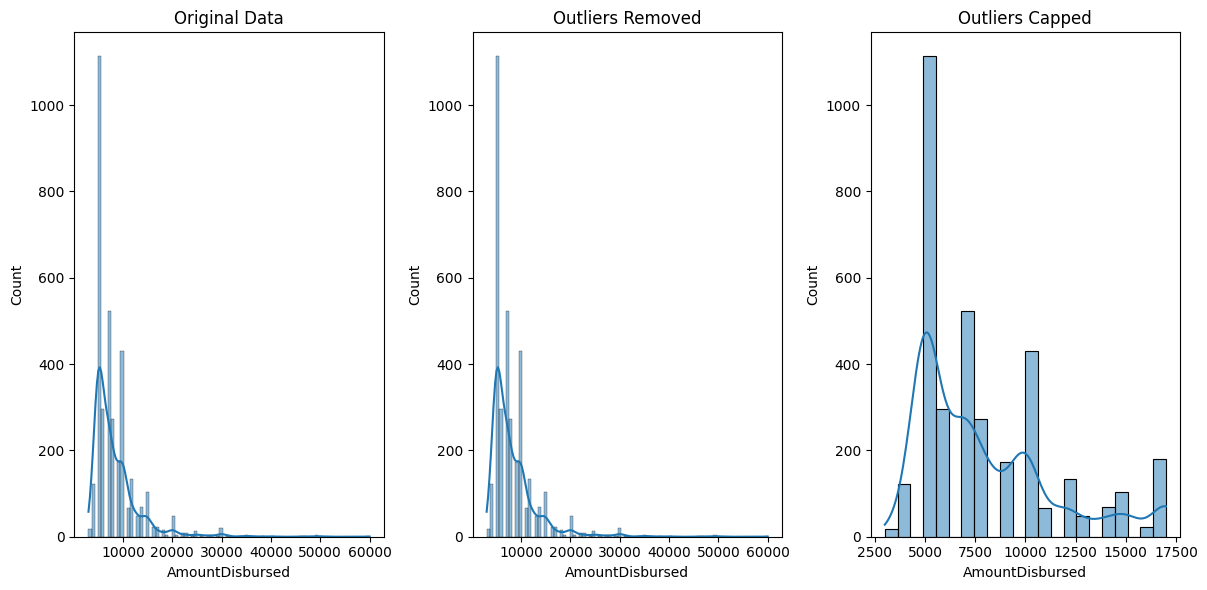

In [310]:
# Visualize results 

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(main_data['AmountDisbursed'], kde=True)
plt.title('Original Data')

plt.subplot(1, 3, 2)
sns.histplot(main_data_no_outliers["AmountDisbursed"], kde=True)
plt.title('Outliers Removed')

plt.subplot(1, 3, 3)
sns.histplot(main_data_capped["AmountDisbursed"], kde=True)
plt.title('Outliers Capped')

plt.tight_layout()
plt.show()

#### c. loan_repayment_total_paid

In [311]:
#log transformation
main_data_log = main_data.copy()
main_data_log['loan_repayment_total_paid'] = np.log1p(
    main_data_log['loan_repayment_total_paid']
)

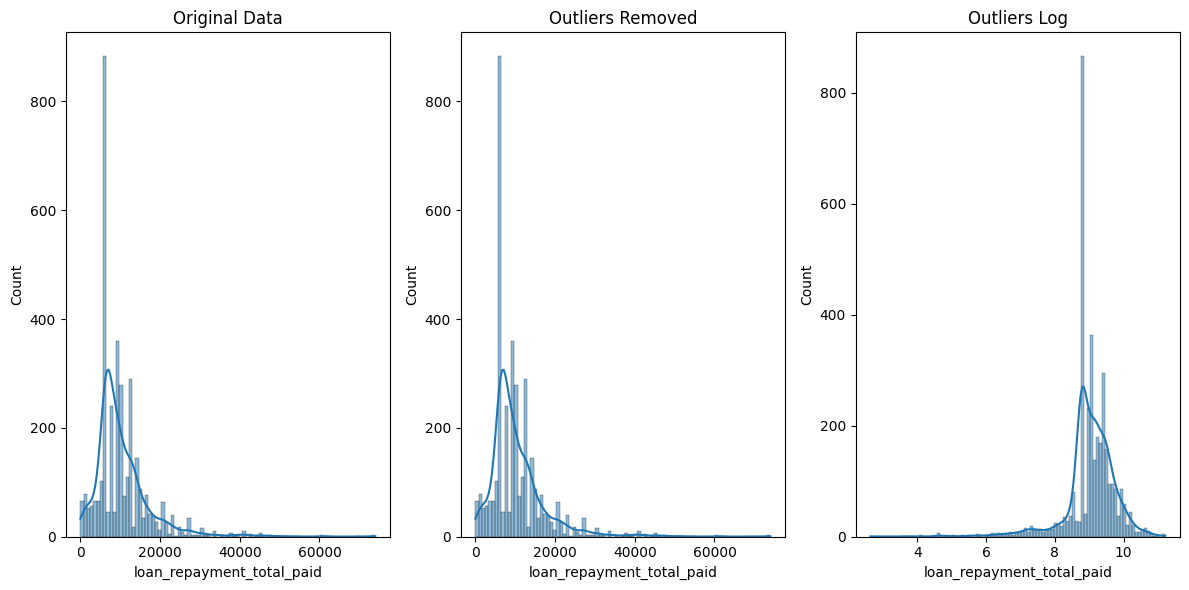

In [312]:
# Visualize results 

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(main_data['loan_repayment_total_paid'], kde=True)
plt.title('Original Data')

plt.subplot(1, 3, 2)
sns.histplot(main_data_no_outliers["loan_repayment_total_paid"], kde=True)
plt.title('Outliers Removed')

plt.subplot(1, 3, 3)
sns.histplot(main_data_log["loan_repayment_total_paid"], kde=True)
plt.title('Outliers Log')

plt.tight_layout()

# 6. Ask questions about dataset

### Try to answer a question you have about the data using a plot / statistic 

### Understand the behaviour of categorical variables 

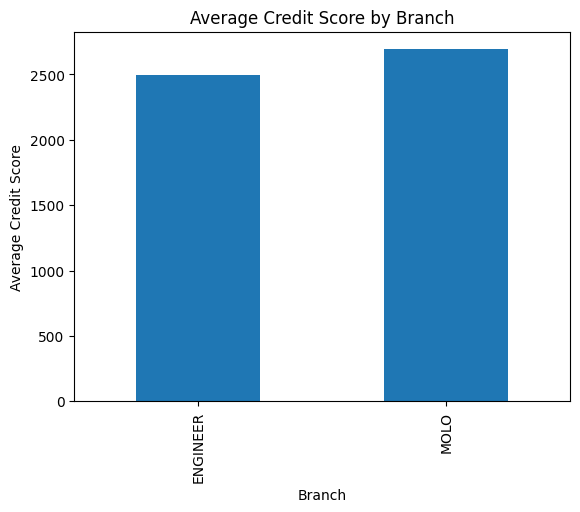

In [313]:
#Branch performance (creditscore)
average_creditscore_by_branch = data.groupby('Branch')['CreditScore'].mean()

average_creditscore_by_branch.plot(kind='bar')

plt.xlabel('Branch')
plt.ylabel('Average Credit Score')
plt.title('Average Credit Score by Branch')

plt.show()

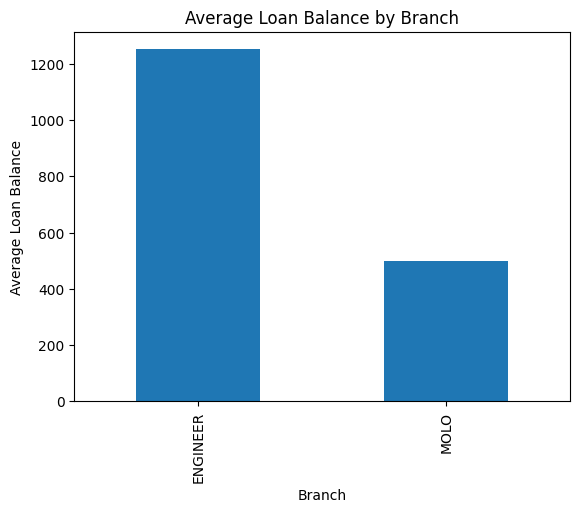

In [314]:
#Branch performance (creditscore)
average_loanbalance_by_branch = data.groupby('Branch')['LoanBalance'].mean()

average_loanbalance_by_branch.plot(kind='bar')

plt.xlabel('Branch')
plt.ylabel('Average Loan Balance')
plt.title('Average Loan Balance by Branch')

plt.show()

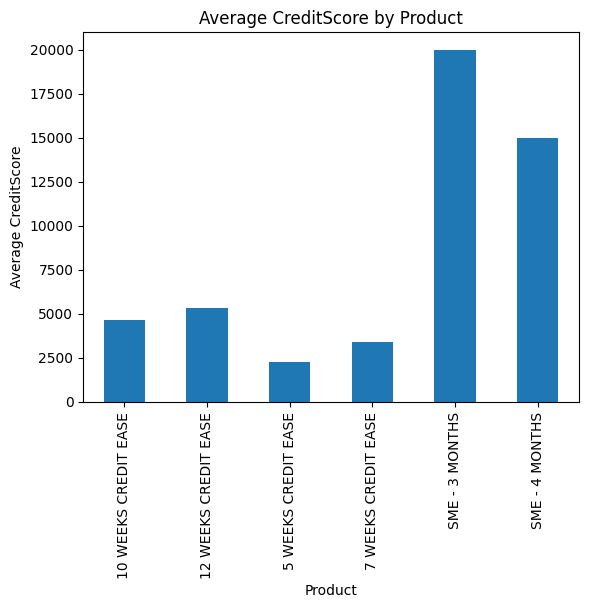

In [315]:
#Product performance 
average_creditscore_by_product = data.groupby('Product')['CreditScore'].mean()

average_creditscore_by_product.plot(kind='bar')

plt.xlabel('Product')
plt.ylabel('Average CreditScore')
plt.title('Average CreditScore by Product')

plt.show()

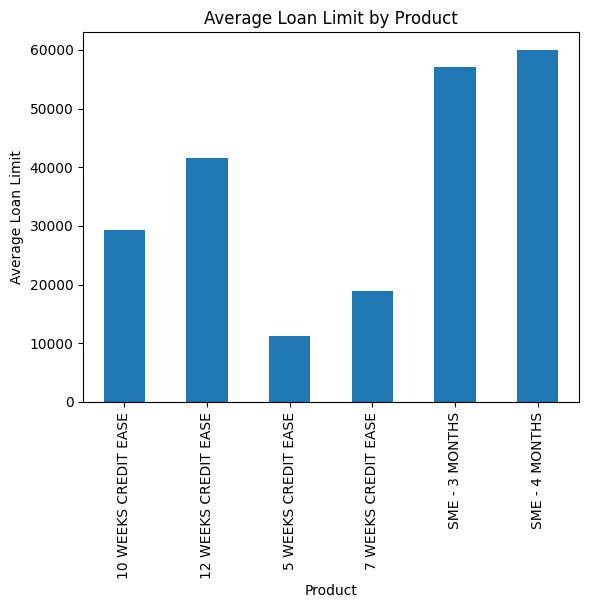

In [316]:
#Product performance 
average_loanlimit_by_product = data.groupby('Product')['LoanLimit'].mean()

average_loanlimit_by_product.plot(kind='bar')

plt.xlabel('Product')
plt.ylabel('Average Loan Limit')
plt.title('Average Loan Limit by Product')

plt.show()

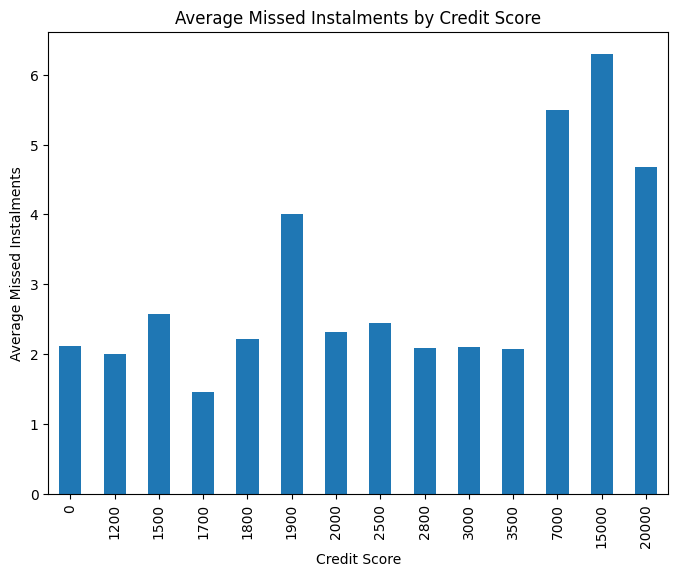

In [317]:
#Credit risk by Missed Instalments

average_missedinstalments_by_creditscore = data.groupby('CreditScore')['MissedInstalments'].mean()

plt.figure(figsize=(8, 6))

average_missedinstalments_by_creditscore.plot(kind='bar')

plt.xlabel('Credit Score')
plt.ylabel('Average Missed Instalments')
plt.title('Average Missed Instalments by Credit Score')

plt.show()

# 6. DATASET REDISTRIBUTION 
imbalanced dataset
   
Ex: fraud detection
- Out of 100000 dataset --> have 100 fraud  
- Techniques: anomaly detection - time-series detection
- anything away from distribution will be considered an anomal


--> reweight (base on the ratio between data points) 

--> resampling (up-sample)

--> synthetic data generation


**Feature engineering:**
- Techniques: feature transformation (binning, one-hot encoding), feature extraction & selection (PCA,...), Feature scaling (min-max scaling, standardization...) 


